### Customer Churn Analysis

### Importing Library

In [347]:
#Data Lib
import numpy as np
import pandas as pd

#Visualization lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#tunning lib
from sklearn.model_selection import GridSearchCV
#metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

#save

import pickle

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [169]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
pd.set_option('display.max_columns',30)
data.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
647,2391-IPLOP,Male,0,Yes,Yes,50,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,One year,Yes,Electronic check,69.65,3442.15,No
143,2636-SJDOU,Male,0,No,No,64,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),84.30,5289.05,No
5730,7167-PCEYD,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.80,1311.3,No
4929,2055-BFOCC,Male,1,Yes,No,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.00,5329.55,No
1885,7217-JYHOQ,Male,0,Yes,Yes,24,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),70.30,1706.45,No
5595,2308-STERM,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,61.05,No


### Data Overview

In [170]:
data.shape

(7043, 21)

In [171]:
data['customerID'].nunique()

7043

As we can see customerID is unique for each customer and its just for identification so here we can remove it.

In [172]:
del data['customerID']

In [173]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [174]:
data.replace(to_replace='Yes',value=1,inplace=True)
data.replace(to_replace='No',value=0,inplace=True)
data.replace(to_replace='No internet service',value=2,inplace=True)
data.replace(to_replace='No phone service',value=2,inplace=True)

In [175]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Null Testing

In [176]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

dataset have no null values.

### Duplicacy Test

In [177]:
data.duplicated().sum()

22

In [178]:
data.drop_duplicates(inplace=True)

In [179]:
data.duplicated().sum()

0

In [180]:
data.replace(to_replace='Yes',value=1,inplace=True)

### String data Test

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   object 


In [182]:
#filtering string features

for col in data.columns:
    if data[col].dtypes=='object':
        print(col)

gender
InternetService
Contract
PaymentMethod
TotalCharges


these are the features in which we have text data, so we need to encode. 

In [183]:
data['gender'].value_counts()

Male      3541
Female    3480
Name: gender, dtype: int64

In [184]:
#features have binary value so converting with 1,0.
data['gender']=data['gender'].map({'Male':1,'Female':0})

In [185]:
data['InternetService'].replace(0,'No',inplace=True)
data['InternetService'].value_counts()

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64

In [186]:
data['Contract'].value_counts()

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [187]:
data['PaymentMethod'].value_counts()

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [190]:
len(data[data['TotalCharges']==' '])

11

In [191]:
data.drop(index=data[data['TotalCharges']==' '].index,inplace=True)

We have total 11 labels in 'Total charges' which is blank so we have delete these observaions.

feature 'totalcharges' having float data but its dtypes showing object. so convert it into float.

In [194]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   object 


Now we have 3 features in which we will apply one hot encoder.

### Encoding

In [204]:
data=pd.get_dummies(data,columns=['InternetService','Contract','PaymentMethod'])

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7010 non-null   int64  
 1   SeniorCitizen                            7010 non-null   int64  
 2   Partner                                  7010 non-null   int64  
 3   Dependents                               7010 non-null   int64  
 4   tenure                                   7010 non-null   int64  
 5   PhoneService                             7010 non-null   int64  
 6   MultipleLines                            7010 non-null   int64  
 7   OnlineSecurity                           7010 non-null   int64  
 8   OnlineBackup                             7010 non-null   int64  
 9   DeviceProtection                         7010 non-null   int64  
 10  TechSupport                              7010 no

In [207]:
data.nunique()

gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
tenure                                       72
PhoneService                                  2
MultipleLines                                 3
OnlineSecurity                                3
OnlineBackup                                  3
DeviceProtection                              3
TechSupport                                   3
StreamingTV                                   3
StreamingMovies                               3
PaperlessBilling                              2
MonthlyCharges                             1584
TotalCharges                               6530
Churn                                         2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
Contract_Month-to-month                 

Data is all clean now . no null values in dataset & all features are numeric now.

### Describe Data

In [208]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.504280,0.162767,0.484023,0.299429,32.520399,0.902996,0.617261,0.717118,0.775606,0.774608,0.720685,0.815264,0.819258,0.593153,64.888666,2290.353388,0.264907,0.344365,0.440799,0.214836,0.549643,0.209986,0.240371,0.219971,0.216976,0.336519,0.226534
std,0.500017,0.369180,0.499780,0.458041,24.520441,0.295985,0.655988,0.795375,0.777045,0.777399,0.794393,0.761816,0.760150,0.491281,30.064769,2266.820832,0.441315,0.475195,0.496518,0.410738,0.497565,0.407327,0.427339,0.414257,0.412215,0.472553,0.418618
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,408.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.400000,1403.875000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3807.837500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


most of the features are categorical and count is equal for all features. rest all looks good for further processing.

### HeatMap for Correlation & Multicollinearity

<AxesSubplot:>

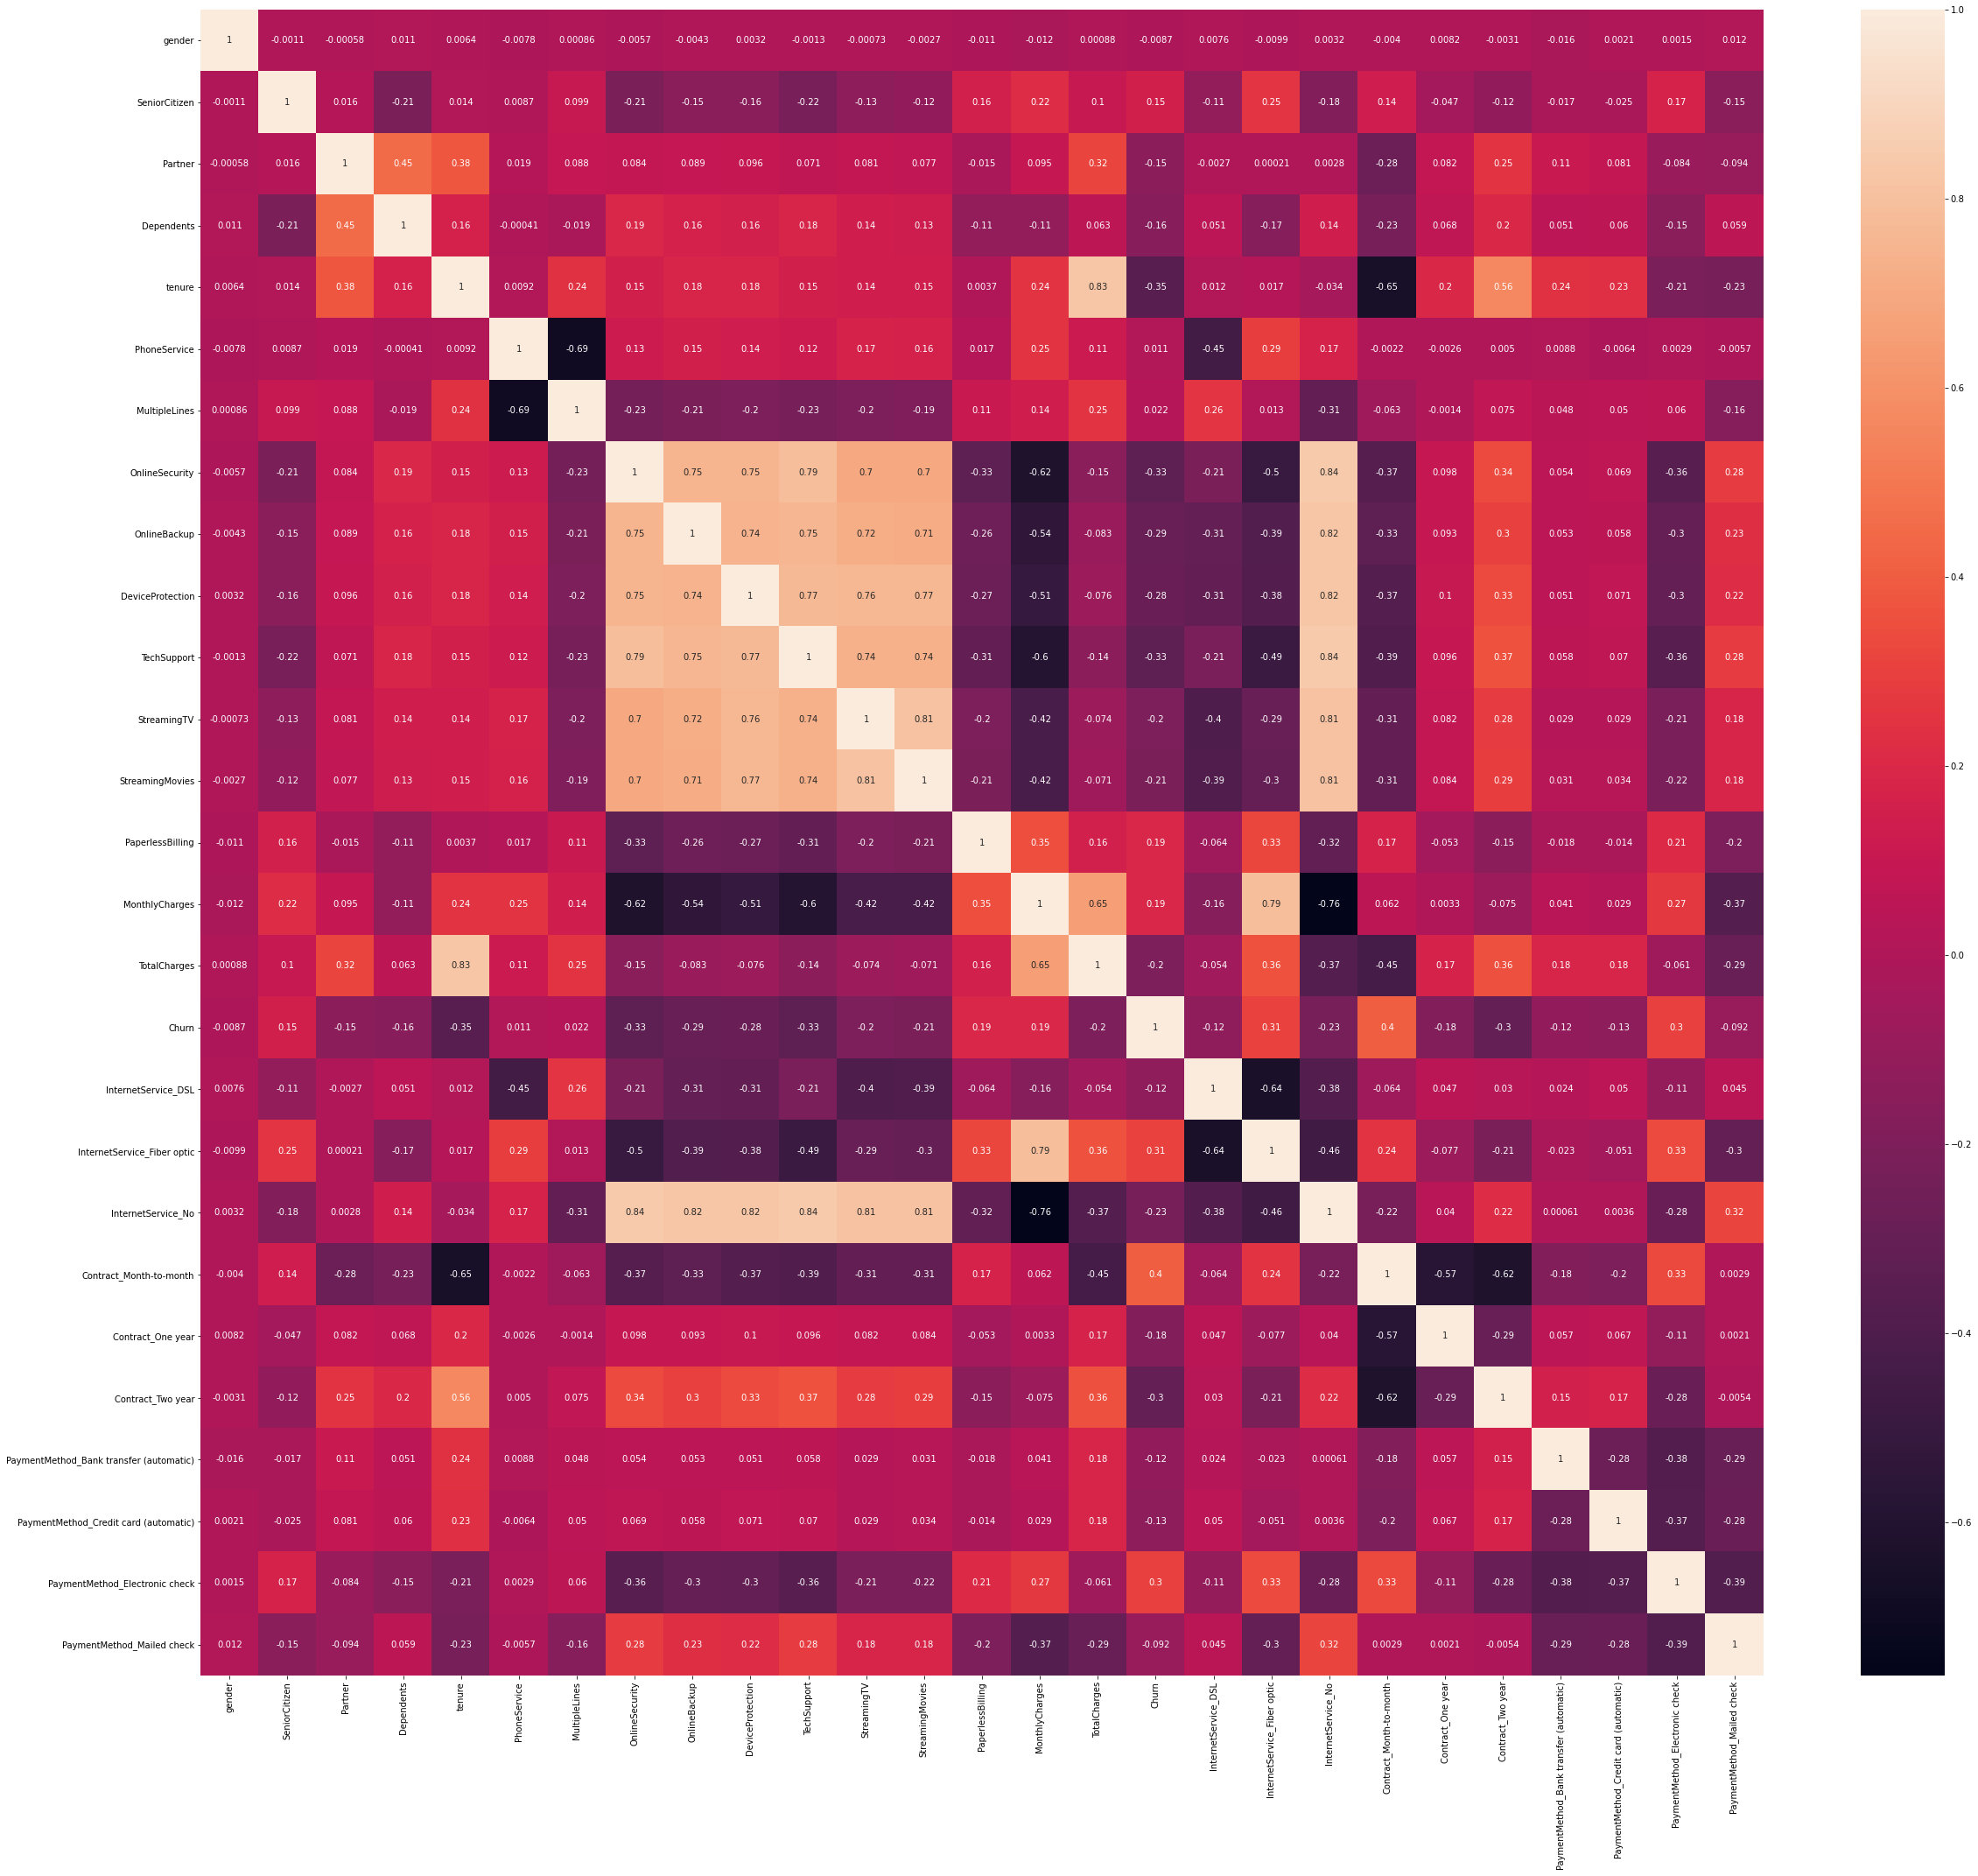

In [209]:
plt.figure(figsize=(40,35))
sns.heatmap(data.corr(),annot=True)

In [221]:
pd.DataFrame(data.corrwith(data['Churn']),columns=['Corr']).sort_values('Corr')

,Corr
tenure,-0.353339
OnlineSecurity,-0.332768
TechSupport,-0.329770
Contract_Two year,-0.301375
OnlineBackup,-0.290946
DeviceProtection,-0.280894
InternetService_No,-0.228220
StreamingMovies,-0.206425
StreamingTV,-0.204523
TotalCharges,-0.198362


In [222]:
del data['gender']

### Distplot for continious features.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

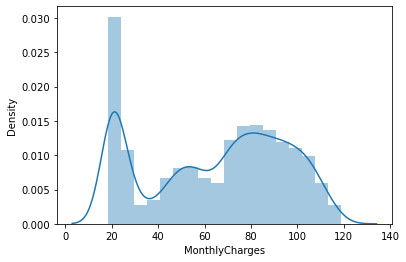

In [225]:
plt.figure()

sns.distplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

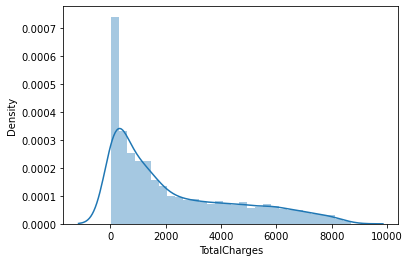

In [234]:
sns.distplot(data['TotalCharges'],bins=30)

dataset is not normally distributed but its looks fine.

### Boxplot

<AxesSubplot:xlabel='MonthlyCharges'>

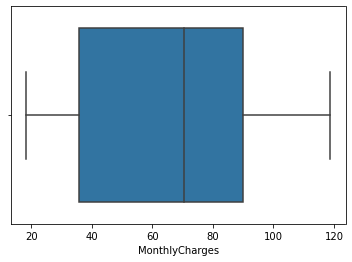

In [235]:
sns.boxplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

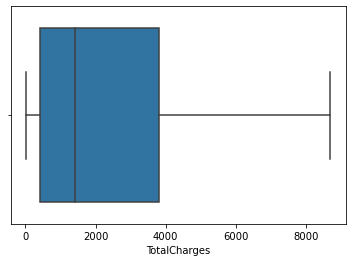

In [236]:
sns.boxplot(data['TotalCharges'])

In boxplot no oulers detect. so we will continue with same data.

### Features Selection

In [239]:
from sklearn.feature_selection import SelectKBest,f_classif

In [241]:
X=data.drop('Churn',axis=1)
y=data.Churn

In [246]:
# find out score of each feature using k best
best_features=SelectKBest(k='all')

fit=best_features.fit(X,y)
scores=pd.DataFrame(fit.scores_)
scores['feature_name']=X.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False).reset_index()

,index,score,column_name
0,18,1369.724405,Contract_Month-to-month
1,3,999.755231,tenure
2,6,872.662474,OnlineSecurity
3,9,855.100220,TechSupport
4,16,732.439926,InternetService_Fiber optic
5,20,700.104043,Contract_Two year
6,23,698.590424,PaymentMethod_Electronic check
7,7,648.085435,OnlineBackup
8,8,600.305266,DeviceProtection
9,17,385.063472,InternetService_No


In [251]:
scores.nlargest(20,'score')

,score,column_name
18,1369.724405,Contract_Month-to-month
3,999.755231,tenure
6,872.662474,OnlineSecurity
9,855.100220,TechSupport
16,732.439926,InternetService_Fiber optic
20,700.104043,Contract_Two year
23,698.590424,PaymentMethod_Electronic check
7,648.085435,OnlineBackup
8,600.305266,DeviceProtection
17,385.063472,InternetService_No


We have select best 20 features which are best & create a seperate dataframe.

In [290]:
New_X=data[scores.nlargest(20,'score').column_name]

In [292]:
data=pd.concat([New_X,y],axis=1)

In [293]:
data.shape

(7010, 21)

### Data Imbalancing

0    5153
1    1857
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

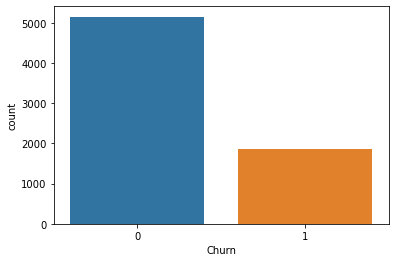

In [297]:
print(data['Churn'].value_counts())
sns.countplot(data["Churn"])

In [354]:
print('We have only',round((1857/7010)*100), '% data with label 1-So we will perform resampling to balance our datset')

We have only 26 % data with label 1-So we will perform resampling to balance our datset


### Resampling

In [301]:
data1=data[data['Churn']==1]
data0=data[data['Churn']==0]

In [302]:
from sklearn.utils import resample

In [303]:
upsample=resample(data0,n_samples=4000,random_state=95)

In [313]:
data=pd.concat([data0,upsample],axis=0)

<AxesSubplot:xlabel='Churn', ylabel='count'>

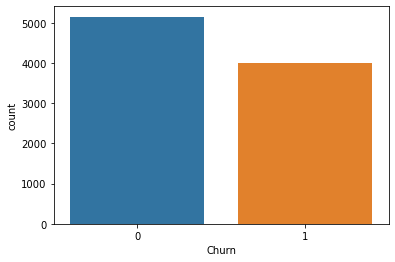

In [314]:
sns.countplot(data["Churn"])

Dataset is balanced now, we can proceed now.

### Split Dataset

In [315]:
X=data.drop('Churn',axis=1)
y=data.Churn

### Scaling

In [316]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(X)

### Train Test Split

In [317]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=91)

In [318]:
# testing best random state
for i in range(10,100,3):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_test)

    print(accuracy_score(y_test,y_pred)*100,i)

76.67103538663171 10
77.10790738313675 13
76.3652249890782 16
76.4089121887287 19
76.84578418523373 22
77.45740498034075 25
76.05941459152469 28
77.15159458278724 31
77.63215377894277 34
76.3652249890782 37
76.88947138488423 40
78.76802096985584 43
78.1564001747488 46
75.92835299257318 49
75.31673219746614 52
76.75840978593273 55
76.4089121887287 58
76.75840978593273 61
76.3652249890782 64
78.02533857579729 67
76.62734818698121 70
77.10790738313675 73
77.50109217999126 76
78.3748361730013 79
78.02533857579729 82
77.54477937964175 85
77.28265618173876 88
76.62734818698121 91
76.62734818698121 94
77.45740498034075 97


In [319]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=78)

### Model Building

In [320]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()

In [321]:
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### Training Score

In [322]:
print(lr.score(x_train,y_train)*100)
print(rfc.score(x_train,y_train)*100)
print(knn.score(x_train,y_train)*100)
print(dt.score(x_train,y_train)*100)

77.3968860966949
99.69953564599837
84.3485386506419
99.69953564599837


### Models Evaluation

In [323]:
#lr score

y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

75.09557618787548


In [324]:
#rfc score

y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

87.49317312943747


In [325]:
#knn score

y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

74.98634625887493


In [326]:
#dt score

y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

84.05243036592026


### Cross Validation

In [327]:
from sklearn.model_selection import cross_val_score

In [328]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scale,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfc,x_scale,y))*100)

print('KNN score:',np.mean(cross_val_score(knn,x_scale,y))*100)

print('Decision Tree score:',np.mean(cross_val_score(dt,x_scale,y))*100)

Logistic Regression score: 76.98038934799283
Random Forest score: 87.85116079182744
KNN score: 76.27014411784894
Decision Tree score: 84.60617238631582


### Cross validation score 88% of Random Forest is maximum and close to test score so would be our final model & model not overfitted/underfitted.

### Hyperparameter Tunning

In [329]:
params={'n_estimators':[5,200,70,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2,6],
        'min_samples_leaf':[2,5,10],
        'max_depth':[5,20]        
        
    
}

grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [344]:
rfc=RandomForestClassifier(criterion= 'entropy',
max_depth= 41,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 86)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

87.38394320043692


### Final Scoring

In [345]:
confusion_matrix(y_test,y_pred)

array([[877, 167],
       [ 64, 723]], dtype=int64)

In [348]:
print(f1_score(y_test,y_pred))

0.8622540250447227


In [349]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1044
           1       0.81      0.92      0.86       787

    accuracy                           0.87      1831
   macro avg       0.87      0.88      0.87      1831
weighted avg       0.88      0.87      0.87      1831



Model performing with around 88% accuracy

### ROC Curve Plot

In [351]:
from sklearn.metrics import plot_roc_curve

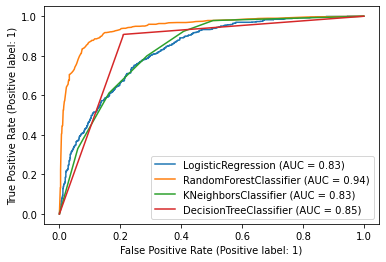

In [352]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)

#### ROC score for Random Forest Classifier is 0.94 which is best amongs all.

### Model Save

In [353]:
filename='Customer_churn.pickle'
pickle.dump(rfc,open(filename,'wb'))